In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wec = pd.read_csv(r"../datasets/wec_2000_sinreg.csv")

In [6]:
wec.head(5)

,Unnamed: 0,iso_code,country,year,biofuel_share_elec,biofuel_elec_per_capita,biofuel_share_energy,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_share_energy,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_energy,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_share_energy,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_share_energy,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_share_energy,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_share_energy,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_share_energy,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_share_energy,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_share_energy,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_share_energy,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_share_energy,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,100,AFG,Afghanistan,2000,0.0,0.0,0.0,0.0,0.0,158.0,0.0,1.881,5.641,0.0,181.707,0.006,0.279,0.467,0.0,0.0,0.155,0.155,0.312,0.0,0.0,0.0,0.0,0.312,0.0,0.0,0.350,277.985,99.95,299.786,9657.439,7.459,33.191,33.191,63.685,191.013,7.459,6153.376,0.324,103.689,66.809,0.05,0.15,15.014,4.832,66.809,0.312,15.014,0.05,0.15,4.832,0.0,0.0,0.0,0.0,0.0,0.0,34.385,103.133,0.0,3322.356,3.829,1223.568,0.0,0.0,0.0,0.0,0.0,22.474,20780000.0,5.777,15.014,66.809,0.05,0.15,4.832,0.0,0.0,0.0,0.0,0.0,1.650883e+10,0.0,0.0,0.0,0.0,0.0
1,101,AFG,Afghanistan,2001,0.0,0.0,0.0,0.0,0.0,158.0,0.0,1.881,5.641,0.0,181.707,0.151,6.986,0.592,0.0,0.0,0.094,0.094,0.498,0.0,0.0,0.0,0.0,0.498,0.0,0.0,0.288,207.409,99.95,299.786,9657.439,4.350,15.878,15.878,63.685,191.013,4.350,6153.376,0.324,103.689,84.122,0.05,0.15,23.048,4.832,84.122,0.498,23.048,0.05,0.15,4.832,0.0,0.0,0.0,0.0,0.0,0.0,34.385,103.133,0.0,3322.356,3.829,1223.568,0.0,0.0,0.0,0.0,0.0,27.399,21607000.0,4.481,23.048,84.122,0.05,0.15,4.832,0.0,0.0,0.0,0.0,0.0,1.557484e+10,0.0,0.0,0.0,0.0,0.0
2,102,AFG,Afghanistan,2002,0.0,0.0,0.0,0.0,0.0,158.0,0.0,1.881,5.641,0.0,181.707,0.122,5.394,0.687,0.0,0.0,0.132,0.132,0.555,0.0,0.0,0.0,0.0,0.555,0.0,0.0,0.166,188.554,99.95,299.786,9657.439,5.840,19.214,19.214,63.685,191.013,5.840,6153.376,0.324,103.689,80.786,0.05,0.15,24.556,4.832,80.786,0.555,24.556,0.05,0.15,4.832,0.0,0.0,0.0,0.0,0.0,0.0,34.385,103.133,0.0,3322.356,3.829,1223.568,0.0,0.0,0.0,0.0,0.0,30.397,22601000.0,4.262,24.556,80.786,0.05,0.15,4.832,0.0,0.0,0.0,0.0,0.0,2.567680e+10,0.0,0.0,0.0,0.0,0.0
3,103,AFG,Afghanistan,2003,0.0,0.0,0.0,0.0,0.0,158.0,0.0,1.881,5.641,0.0,181.707,0.203,8.581,0.939,0.0,0.0,0.309,0.309,0.630,0.0,0.0,0.0,0.0,0.630,0.0,0.0,0.181,212.873,99.95,299.786,9657.439,13.048,32.907,32.907,63.685,191.013,13.048,6153.376,0.324,103.689,67.093,0.05,0.15,26.604,4.832,67.093,0.630,26.604,0.05,0.15,4.832,0.0,0.0,0.0,0.0,0.0,0.0,34.385,103.133,0.0,3322.356,3.829,1223.568,0.0,0.0,0.0,0.0,0.0,39.652,23681000.0,5.041,26.604,67.093,0.05,0.15,4.832,0.0,0.0,0.0,0.0,0.0,2.780556e+10,0.0,0.0,0.0,0.0,0.0
4,104,AFG,Afghanistan,2004,0.0,0.0,0.0,0.0,0.0,158.0,0.0,1.881,5.641,0.0,18

In [21]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values = wec.groupby('country').agg({'fossil_share_energy' : 'mean', 'renewables_share_energy': 'mean', "other_renewables_share_energy" : 'mean','oil_production': 'mean', 'coal_consumption': 'mean','renewables_consumption': 'mean', 'primary_energy_consumption': 'mean', 
'gdp': 'mean', 'population': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
medias = pd.DataFrame({'country': mean_values['country'],
                          'mean_rc': mean_values['renewables_consumption'],
                          'mean_gdp': mean_values['gdp'],
                          'mean_pec': mean_values['primary_energy_consumption'],
                          'mean_pop': mean_values['population'],
                          'mean_oil_p': mean_values['oil_production']})

In [7]:
shares = wec.groupby('country').agg({'fossil_share_energy' : 'mean', 'renewables_share_energy': 'mean', "nuclear_share_energy" : 'mean','gdp': 'mean', 'population': 'mean'}).reset_index()



In [8]:
shares

,country,fossil_share_energy,renewables_share_energy,nuclear_share_energy,gdp,population
0,Afghanistan,99.950000,0.050000,0.000000,4.580057e+10,2.930565e+07
1,Albania,99.950000,0.050000,0.000000,2.628837e+10,2.989200e+06
2,Algeria,99.831500,0.168500,0.000000,4.189500e+11,3.621815e+07
3,American Samoa,99.727000,0.273000,0.000000,5.340000e+11,5.715000e+04
4,Angola,99.727000,0.273000,0.000000,9.171439e+10,2.336295e+07
5,Antigua and Barbuda,99.727000,0.273000,0.000000,1.480000e+11,8.695000e+04
6,Argentina,84.168810,13.645952,2.185238,7.117619e+11,4.095652e+07
7,Armenia,84.271000,13.556000,2.173000,2.096308e+10,2.950350e+06
8,Aruba,84.271000,13.556000,2.173000,2.798737e+10,1.009500e+05
9,Australia,94.530524,5.469476,0.000000,9.281429e+11,2.211081e+07


In [5]:
suma = shares["renewables_share_energy"]+shares["fossil_share_energy"]+shares["nuclear_share_energy"]

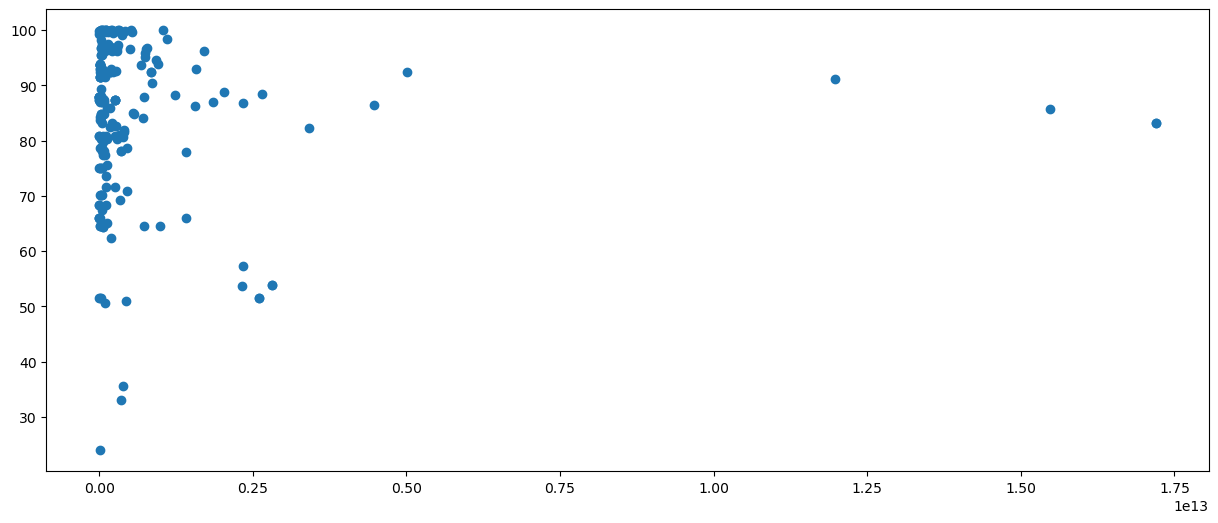

In [9]:
plt.figure(figsize=(15, 6))
gdp_fos = shares[['gdp', 'fossil_share_energy']]
gdp, fos = shares.gdp, shares.fossil_share_energy

plt.scatter(gdp, fos)

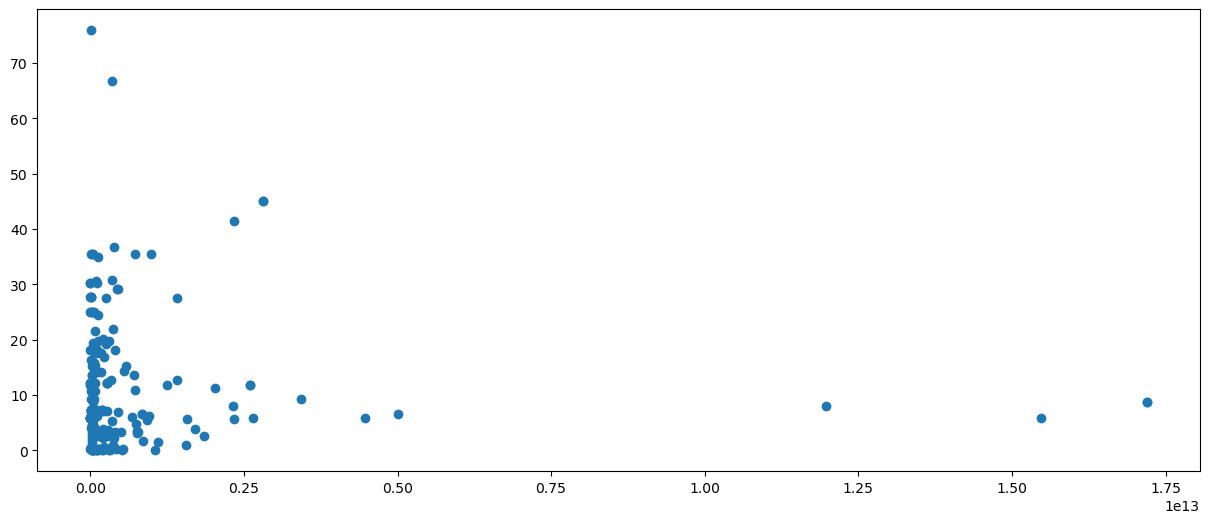

In [10]:
plt.figure(figsize=(15, 6))
gdp_ren = shares[['gdp', 'renewables_share_energy']]
gdp, ren = shares.gdp, shares.renewables_share_energy

plt.scatter(gdp, ren)

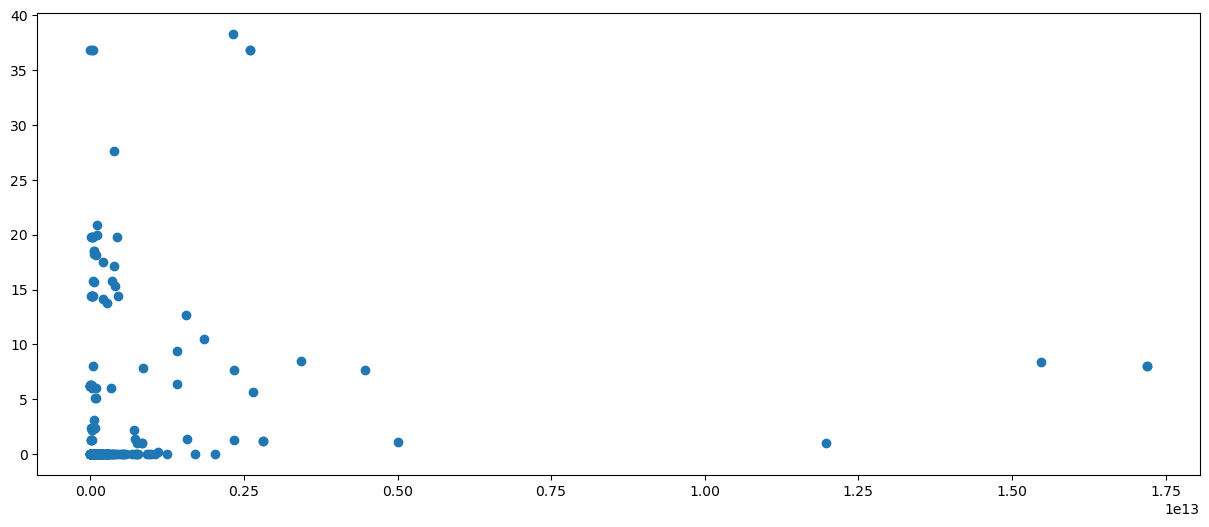

In [11]:
plt.figure(figsize=(15, 6))
gdp_nuc = shares[['gdp', 'nuclear_share_energy']]
gdp, nuc = shares.gdp, shares.nuclear_share_energy

plt.scatter(gdp, nuc)

In [12]:
plt.figure(figsize=(15, 6))

gdp_ene = df[['gdp', 'energy_per_capita']]
gdp, ene = df.gdp, df.energy_per_capita

plt.scatter(gdp, ene)

NameError: name 'df' is not defined

<Figure size 1500x600 with 0 Axes>

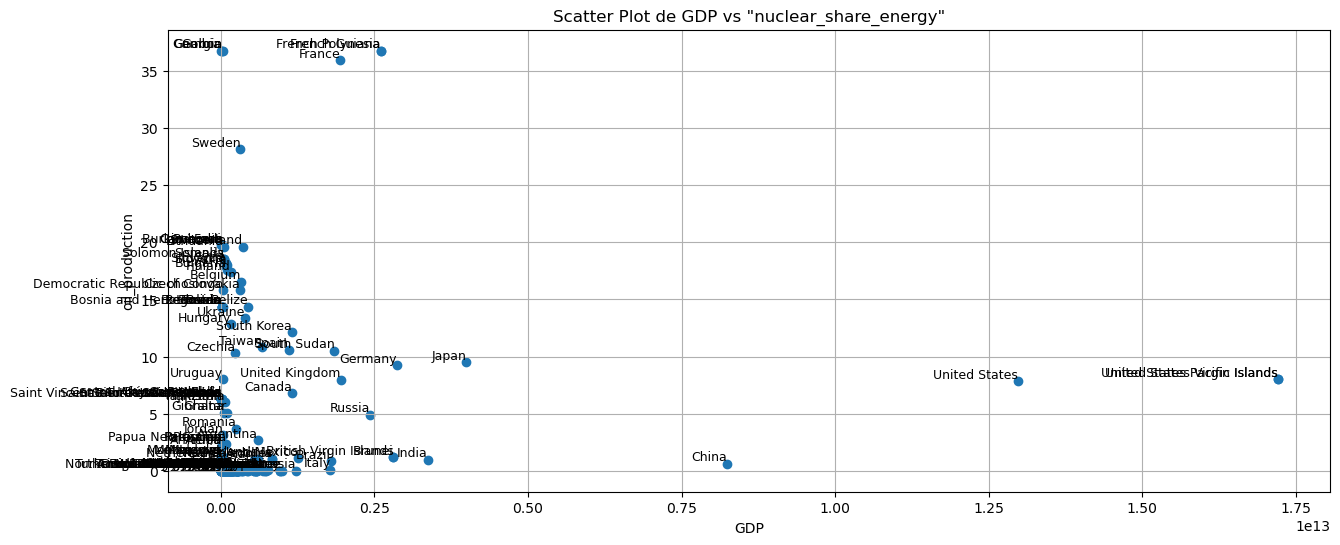

In [142]:
# Graficar el scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(shares["gdp"], shares["nuclear_share_energy"])
for i, country in enumerate(shares["country"]):
    plt.text(shares["gdp"].iloc[i], shares["nuclear_share_energy"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs "nuclear_share_energy"')
plt.xlabel('GDP')
plt.ylabel('oil_production')
plt.grid(True)
plt.show()

In [10]:
# Graficar el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_values['gdp'], mean_values["renewables_consumption"])
for i, country in enumerate(mean_values["country"]):
    plt.text(mean_values["gdp"].iloc[i], mean_values["renewables_consumption"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs "renewables_consumption"')
plt.xlabel('GDP')
plt.ylabel('renewables_consumption')
plt.grid(True)
plt.show()

NameError: name 'mean_values' is not defined

<Figure size 1000x600 with 0 Axes>

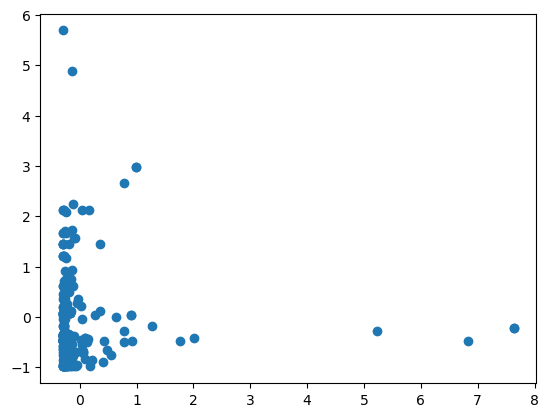

In [13]:
from sklearn.cluster import DBSCAN

X = gdp_ren.to_numpy()

from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [8]:

dbscan_cluster_model1 = DBSCAN(eps=0.2, min_samples=15).fit(X_)
dbscan_cluster_model1

DBSCAN(eps=0.2, min_samples=15)

In [9]:
gdp_ren['cluster'] = dbscan_cluster_model1.labels_


C:\Users\Luna\AppData\Local\Temp\ipykernel_3060\735809802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_ren['cluster'] = dbscan_cluster_model1.labels_


In [10]:
gdp_ren['cluster'].value_counts()

cluster
-1    220
Name: count, dtype: int64

In [11]:
import plotly.express as px

fig = px.scatter(x=gdp, y=ren, color=gdp_ren['cluster'])

fig.show()


In [12]:
from sklearn.metrics import silhouette_score as ss

ss(X_scaled, gdp_ren['cluster'])

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [13]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [14]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [15]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [16]:
N = len(combinations)
N

90

In [17]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}



In [18]:
best_dict = get_scores_and_labels(combinations, X_scaled)

Index: 0, Score: -0.006798306034380232, Labels: [ 0  0 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1  3  3  3  3  3
  3 -1  4  4 -1  5  5  5  5 -1  6  6  6  6 -1 -1 -1  7  7  7  8  8 -1 -1
 -1 -1 -1 -1 -1  9  9 -1 -1 -1 10 10 10 -1 11 -1 12 12 12 -1 -1 13 13 14
 14 14 -1 15 -1 -1 16 16 16 16 -1 17 17 17 17 17 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  5 -1 -1 18 18 -1 19 19 15 -1 20 20 -1 -1 -1 -1 21 21 -1 -1
 22 22 22 22 22 -1 11 11 11 11 -1 23 -1 23 23 23 -1 24 24 -1 25 25 -1 -1
 -1 -1 26 -1 27 -1 26 26 -1 26 -1 -1 -1 -1 -1 28 -1 -1 -1 29 29 29 29 29
 29 29 29 -1 19 -1 19 19 -1 -1 -1 30 30 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2
 -1 -1 -1 31 31 19 27 -1  0 28 28 19 -1 -1 -1 -1 32 32 -1 -1 -1 -1 -1 -1
 33 33 34 34], NumClusters: 35
Index: 1, Score: -0.396844153849897, Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1


In [19]:
best_dict

{'best_epsilon': 0.7171428571428572,
 'best_min_samples': 2,
 'best_labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [20]:
gdp_ren['cluster'] = best_dict['best_labels']

gdp_ren['cluster'].value_counts()

C:\Users\Luna\AppData\Local\Temp\ipykernel_3060\3333956587.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



cluster
 0    214
-1      2
 1      2
 2      2
Name: count, dtype: int64

In [22]:
fig = px.scatter(x=gdp, y=ren, color=gdp_ren['cluster'])
fig.show()

# MODELO 4 FEATURES

In [67]:
X2 = shares.drop(columns=["country"]).to_numpy()
X2

array([[9.95170000e+01, 4.83000000e-01, 0.00000000e+00, 3.66350467e+10,
        2.29556389e+07],
       [9.95170000e+01, 4.83000000e-01, 0.00000000e+00, 2.03332056e+10,
        3.05516667e+06],
       [9.97938333e+01, 2.06166667e-01, 0.00000000e+00, 3.28916667e+11,
        3.19056667e+07],
       ...,
       [8.47840000e+01, 1.52160000e+01, 0.00000000e+00, 6.27220767e+10,
        2.91620000e+07],
       [8.47840000e+01, 1.52160000e+01, 0.00000000e+00, 2.50919652e+10,
        1.13355833e+07],
       [8.47840000e+01, 1.52160000e+01, 0.00000000e+00, 2.68340421e+10,
        1.18521944e+07]])

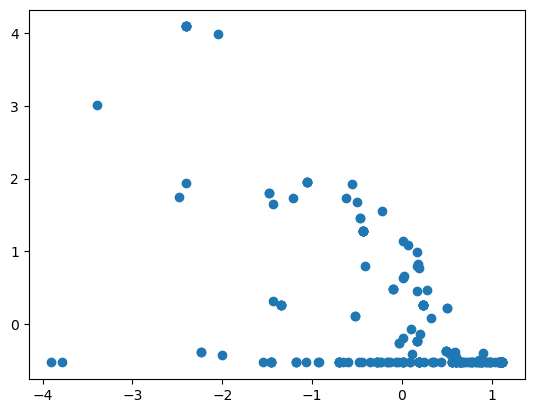

In [73]:

X2_scaled = StandardScaler().fit_transform(X2)

plt.scatter(X2_scaled[:, 0], X2_scaled[:, 2])

In [75]:

dbscan_cluster_model2 = DBSCAN(eps=0.2, min_samples=15).fit(X2_scaled)
dbscan_cluster_model2

DBSCAN(eps=0.2, min_samples=15)

In [76]:
shares['cluster'] = dbscan_cluster_model2.labels_


In [77]:
shares['cluster'].value_counts()

cluster
-1    151
 0     35
 1     34
Name: count, dtype: int64

In [78]:
import plotly.express as px

fig = px.scatter(x=gdp, y=fos, color=shares['cluster'])

fig.show()


In [79]:
from sklearn.metrics import silhouette_score as ss

ss(X2_scaled, shares['cluster'])

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



0.01794589378788652

In [37]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [38]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [39]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [40]:
N = len(combinations)
N

90

In [80]:
best_dict2 = get_scores_and_labels(combinations, X2_scaled)

Index: 0, Score: -0.3968256882106064, Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0 -1 -1
  0 -1  1  1 -1  2 -1  2 -1 -1  3  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  4  4 -1 -1 -1 -1 -1 -1 -1 -1 -1  5  5  5 -1 -1  6  6  7
  7 -1 -1 -1 -1 -1  8  8  8  8 -1  9 10 10  9 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 11 11 -1 12 12 -1 -1 13 13 -1 -1 -1 -1 -1 -1 -1 -1
 -1 14 14 -1 14 -1 -1 -1 15 15 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 16 16 16 16
 16 16 16 -1 -1 -1 -1 12 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 17 17 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 18 18], NumClusters: 19
Combination (0.01, 5) on iteration 2 of 90 has 1 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters

In [81]:
best_dict2

{'best_epsilon': 1.0,
 'best_min_samples': 2,
 'best_labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         2,  2,  2,  3,  3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  4, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1,  5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1, -1,

In [82]:
shares['cluster'] = best_dict2['best_labels']

shares['cluster'].value_counts()

cluster
 0    201
-1      7
 2      3
 3      3
 1      2
 4      2
 5      2
Name: count, dtype: int64

In [83]:
fig = px.scatter(x=gdp, y=ren, color=shares['cluster'])
fig.show()

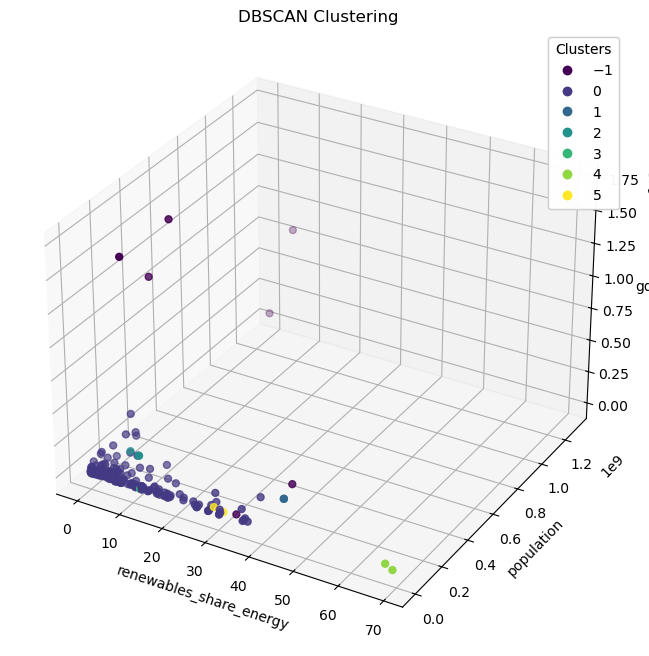

In [144]:
# fossil_share_energy' : 'mean', 'renewables_share_energy': 'mean', "nuclear_share_energy" : 'mean','gdp': 'mean', 'population': 'mean'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(shares['renewables_share_energy'], shares['population'], shares['gdp'],
                     c=shares['cluster'], cmap='viridis', s=25)

ax.set_xlabel('renewables_share_energy')
ax.set_ylabel('population')
ax.set_zlabel('gdp')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

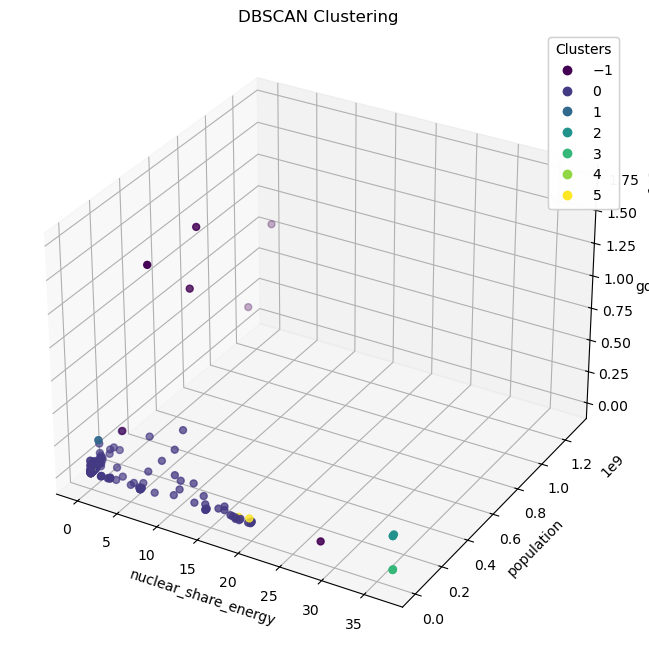

In [143]:
# fossil_share_energy' : 'mean', 'renewables_share_energy': 'mean', "nuclear_share_energy" : 'mean','gdp': 'mean', 'population': 'mean'

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(shares['nuclear_share_energy'], shares['population'], shares['gdp'],
                     c=shares['cluster'], cmap='viridis', s=25)

ax.set_xlabel('nuclear_share_energy')
ax.set_ylabel('population')
ax.set_zlabel('gdp')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [86]:
cluster1 = shares.loc[shares["cluster"] == 1, 'country']
cluster1


26    British Virgin Islands
27                    Brunei
Name: country, dtype: object

In [89]:
cluster2 = shares.loc[shares["cluster"] == 2, 'country']
cluster2

68              France
69       French Guiana
70    French Polynesia
Name: country, dtype: object

In [90]:
cluster3 = shares.loc[shares["cluster"] == 3, 'country']
cluster3

71      Gabon
72     Gambia
73    Georgia
Name: country, dtype: object

In [92]:
cluster4 = shares.loc[shares["cluster"] == 4, 'country']
cluster4

90     Iceland
147     Norway
Name: country, dtype: object

In [93]:
cluster5 = shares.loc[shares["cluster"] == 5, 'country']
cluster5

188    Switzerland
189          Syria
Name: country, dtype: object

In [88]:
cluster0 = shares.loc[shares["cluster"] == 0, 'country']
cluster0

0                           Afghanistan
1                               Albania
2                               Algeria
3                        American Samoa
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                                 Aruba
9                             Australia
10                              Austria
11                           Azerbaijan
12                              Bahamas
13                              Bahrain
14                           Bangladesh
15                             Barbados
16                              Belarus
17                              Belgium
18                               Belize
19                                Benin
20                              Bermuda
21                               Bhutan
22                              Bolivia
23               Bosnia and Herzegovina
24                             Botswana


In [94]:
ruido = shares.loc[shares["cluster"] == -1, 'country']
ruido

25                            Brazil
39                             China
91                             India
187                           Sweden
207                    United States
208    United States Pacific Islands
209     United States Virgin Islands
Name: country, dtype: object

In [84]:
fig = px.scatter(x=gdp, y=fos, color=shares['cluster'])
fig.show()

In [85]:
fig = px.scatter(x=gdp, y=nuc, color=shares['cluster'])
fig.show()

4 features 2

In [95]:
df = wec.groupby('country').agg({'fossil_share_energy' : 'mean', 'renewables_share_energy': 'mean', "nuclear_share_energy" : 'mean','gdp': 'mean', "energy_per_capita": "mean"}).reset_index()

In [96]:
X3 = df.drop(columns=["country"]).to_numpy()
X3

array([[9.95170000e+01, 4.83000000e-01, 0.00000000e+00, 3.66350467e+10,
        8.67041417e+02],
       [9.95170000e+01, 4.83000000e-01, 0.00000000e+00, 2.03332056e+10,
        1.14061736e+04],
       [9.97938333e+01, 2.06166667e-01, 0.00000000e+00, 3.28916667e+11,
        1.21262355e+04],
       ...,
       [8.47840000e+01, 1.52160000e+01, 0.00000000e+00, 6.27220767e+10,
        2.52517600e+03],
       [8.47840000e+01, 1.52160000e+01, 0.00000000e+00, 2.50919652e+10,
        3.43570444e+03],
       [8.47840000e+01, 1.52160000e+01, 0.00000000e+00, 2.68340421e+10,
        4.36088619e+03]])

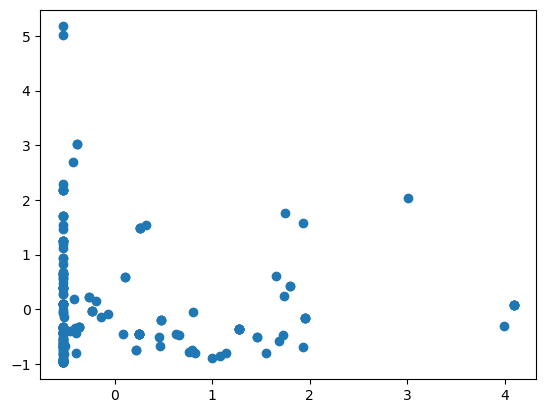

In [65]:

X3_scaled = StandardScaler().fit_transform(X3)

plt.scatter(X3_scaled[:, 3], X3_scaled[:, 1])

In [97]:

dbscan_cluster_model3 = DBSCAN(eps=0.2, min_samples=15).fit(X3_scaled)
dbscan_cluster_model3

DBSCAN(eps=0.2, min_samples=15)

In [98]:
df['cluster'] = dbscan_cluster_model3.labels_


In [99]:
df['cluster'].value_counts()

cluster
-1    220
Name: count, dtype: int64

In [ ]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [ ]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [ ]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [ ]:
N = len(combinations)
N

90

In [100]:
best_dict3 = get_scores_and_labels(combinations, X3_scaled)

Index: 0, Score: -0.47731015300491164, Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1], NumClusters: 3
Combination (0.01, 5) on iteration 2 of 90 has 0 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters

In [101]:
best_dict3

{'best_epsilon': 1.0,
 'best_min_samples': 5,
 'best_labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        -1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1,  1,  1,  1,  1,  1,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0, -1, -1,

In [102]:
df['cluster'] = best_dict3['best_labels']

df['cluster'].value_counts()

cluster
 0    181
-1     31
 1      8
Name: count, dtype: int64

In [103]:
fig = px.scatter(x=gdp, y=ren, color=df['cluster'])
fig.show()

In [106]:
fig = px.scatter(x=gdp, y=fos, color=df['cluster'])
fig.show()

In [107]:
fig = px.scatter(x=gdp, y=nuc, color=df['cluster'])
fig.show()

In [108]:
fig = px.scatter(x=gdp, y=ene, color=df['cluster'])
fig.show()

In [109]:
cluster1 = df.loc[df["cluster"] == 1, 'country']
cluster1


53               Djibouti
54               Dominica
55     Dominican Republic
140             Nicaragua
141                 Niger
142               Nigeria
143                  Niue
144           North Korea
Name: country, dtype: object

In [110]:
ruido = df.loc[df["cluster"] == -1, 'country']
ruido

25                            Brazil
26            British Virgin Islands
27                            Brunei
33                            Canada
39                             China
67                           Finland
68                            France
69                     French Guiana
70                  French Polynesia
71                             Gabon
72                            Gambia
73                           Georgia
76                         Gibraltar
90                           Iceland
91                             India
92                         Indonesia
99                             Japan
109                          Lebanon
110                          Lesotho
111                          Liberia
112                            Libya
139                      New Zealand
147                           Norway
155                      Philippines
162                           Russia
187                           Sweden
188                      Switzerland
1

In [ ]:
fossil_share_energy' : 'mean', 'renewables_share_energy': 'mean', "nuclear_share_energy" : 'mean','gdp': 'mean', "energy_per_capita": "mean"
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['fossil_share_energy'], df['renewables_share_energy'], df['energy_per_capita'],
                     c=df['cluster'], cmap='viridis', s=50)

ax.set_xlabel('low_carbon_share_energy')
ax.set_ylabel('gdp')
ax.set_zlabel('energy_per_capita')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

# low carbon, gdp

In [117]:

lc = wec.groupby('country').agg({'low_carbon_share_energy': 'mean','gdp': 'mean', 'energy_per_capita': 'mean'}).reset_index()


In [114]:
suma = lc["fossil_share_energy"]+lc["low_carbon_share_energy"]

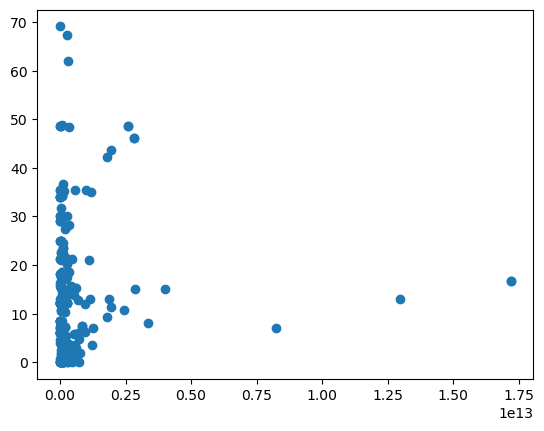

In [118]:
gdp_fos = lc[['gdp', 'low_carbon_share_energy']]
gdp, fos = lc.gdp, lc.low_carbon_share_energy

plt.scatter(gdp, fos)

In [120]:
X4 = lc.drop(columns=["country"]).to_numpy()
X4

array([[4.83000000e-01, 3.66350467e+10, 8.67041417e+02],
       [4.83000000e-01, 2.03332056e+10, 1.14061736e+04],
       [2.06166667e-01, 3.28916667e+11, 1.21262355e+04],
       [2.73000000e-01, 5.34000000e+11, 4.00521779e+04],
       [2.73000000e-01, 5.87688733e+10, 2.56000800e+03],
       [2.73000000e-01, 1.48000000e+11, 2.94516977e+04],
       [1.52515405e+01, 6.10243243e+11, 1.92928957e+04],
       [1.57290000e+01, 1.76913621e+10, 1.28511350e+04],
       [1.57290000e+01, 2.79873720e+10, 4.51500275e+04],
       [4.88586486e+00, 7.39081081e+11, 6.63300947e+04],
       [3.00448108e+01, 2.83378378e+11, 4.57496459e+04],
       [3.96743243e+00, 7.85290616e+10, 2.18049833e+04],
       [2.48000000e+00, 1.45000000e+11, 4.18236603e+04],
       [2.48000000e+00, 2.69849269e+10, 1.52376535e+05],
       [1.71583784e+00, 2.74459459e+11, 1.37197100e+03],
       [6.37000000e-01, 4.13510722e+09, 2.35465514e+04],
       [1.33270270e-01, 1.28434808e+11, 3.23676357e+04],
       [1.84805135e+01, 3.36513

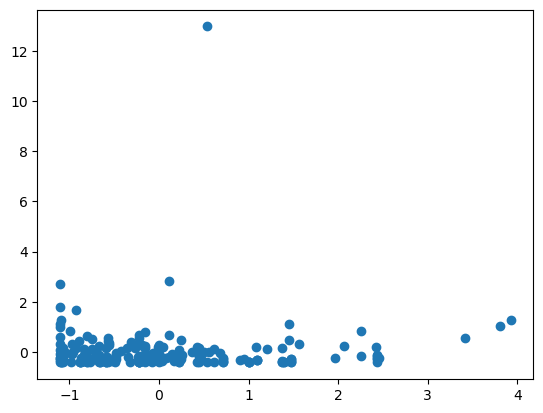

In [123]:

X4_scaled = StandardScaler().fit_transform(X4)

plt.scatter(X4_scaled[:, 0], X4_scaled[:, 2])

In [124]:
best_dict4 = get_scores_and_labels(combinations, X4_scaled)

Index: 0, Score: -0.5273201357095005, Labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0
 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3  3  4  3 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  5  5 -1 -1 -1 -1 -1  6  6 -1 -1 -1 -1  7  7 -1 -1
 -1 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1  4 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  8
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1], NumClusters: 9
Combination (0.01, 5) on iteration 2 of 90 has 0 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters.

In [125]:
best_dict4

{'best_epsilon': 0.9292857142857143,
 'best_min_samples': 2,
 'best_labels': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [126]:
lc['cluster'] = best_dict4['best_labels']

lc['cluster'].value_counts()

cluster
 0    212
-1      5
 1      3
Name: count, dtype: int64

In [127]:
cluster1 = lc.loc[lc["cluster"] == 1, 'country']
cluster1

90     Iceland
147     Norway
187     Sweden
Name: country, dtype: object

In [128]:
ruido = lc.loc[lc["cluster"] == -1, 'country']
ruido

39                             China
76                         Gibraltar
207                    United States
208    United States Pacific Islands
209     United States Virgin Islands
Name: country, dtype: object

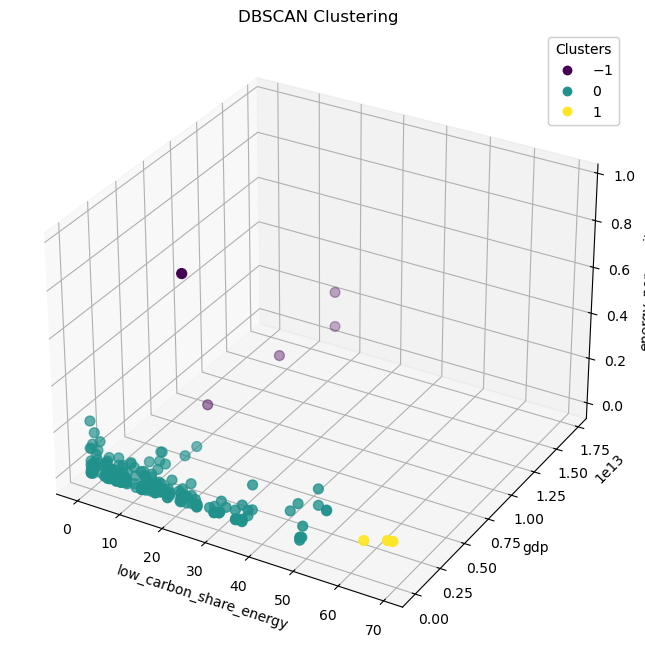

In [129]:
# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(lc['low_carbon_share_energy'], lc['gdp'], lc['energy_per_capita'],
                     c=lc['cluster'], cmap='viridis', s=50)

ax.set_xlabel('low_carbon_share_energy')
ax.set_ylabel('gdp')
ax.set_zlabel('energy_per_capita')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

# DBSCAN 2 FEATURES

In [96]:
features = ["gdp", "primary_energy_consumption"]
X = mean_values[features]
X.head(5)

,gdp,primary_energy_consumption
0,3.626833e+10,17.649525
1,1.925028e+10,36.627075
2,3.199250e+11,377.235475
3,5.340000e+11,2.109125
4,5.485567e+10,48.328450


## Eliminando outliers

In [80]:
Q1 = X.quantile(0.10)
Q3 = X.quantile(0.90)
IQR = Q3 - Q1

# Encuentra las posiciones de los outliers
outlier_positions = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_= X[~outlier_positions]
X_.shape



(205, 2)

In [97]:
X_ = X

In [98]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X_)

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [99]:
pd.DataFrame(X_scal).shape

(208, 2)

In [100]:
from sklearn.cluster import DBSCAN


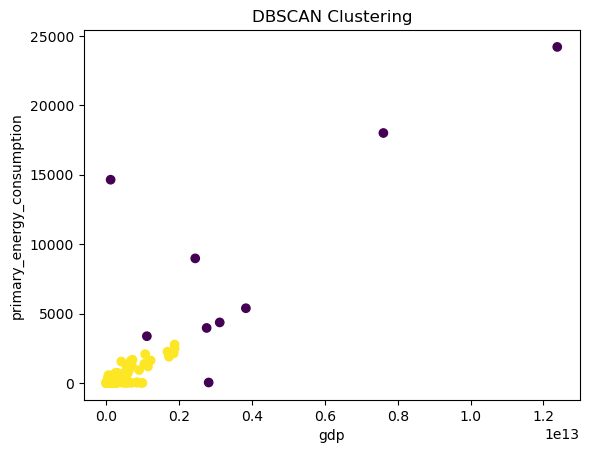

In [101]:

# Aplica DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=X_.columns)
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
plt.scatter(X_with_labels['gdp'], X_with_labels['primary_energy_consumption'], c=X_with_labels['Cluster'], cmap='viridis')
plt.xlabel('gdp')
plt.ylabel('primary_energy_consumption')
plt.title('DBSCAN Clustering')
plt.show()


Eps= 0,5. Tenemos 3 grupos distintos: El violeta con mediano-alto gdp y alto consumo energético, el amarillo con bajo consumo energético y gdp mediano, y el verde con gdp bajo-mediano y consumo energético bajo-mediano. 

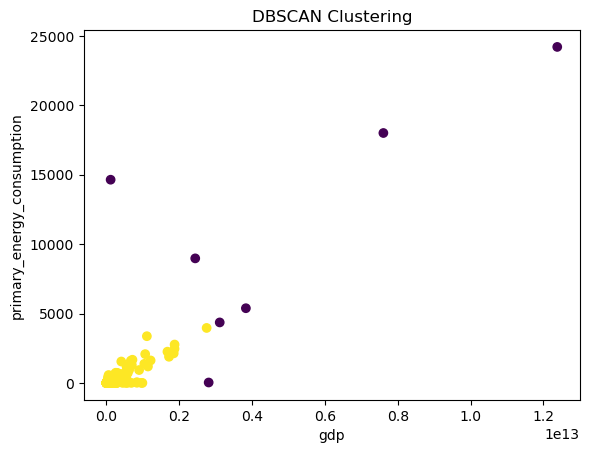

In [103]:

# Aplica DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=X_.columns)
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
plt.scatter(X_with_labels['gdp'], X_with_labels['primary_energy_consumption'], c=X_with_labels['Cluster'], cmap='viridis')
plt.xlabel('gdp')
plt.ylabel('primary_energy_consumption')
plt.title('DBSCAN Clustering')
plt.show()


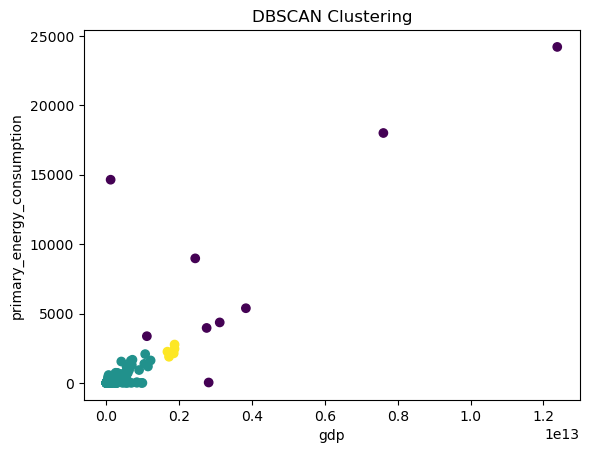

In [104]:

# Aplica DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=X_.columns)
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
plt.scatter(X_with_labels['gdp'], X_with_labels['primary_energy_consumption'], c=X_with_labels['Cluster'], cmap='viridis')
plt.xlabel('gdp')
plt.ylabel('primary_energy_consumption')
plt.title('DBSCAN Clustering')
plt.show()


In [102]:
from sklearn.metrics.pairwise import pairwise_distances

avg_distance = pairwise_distances(X_scal).mean()
avg_distance


0.7410597043284834

In [105]:
features = ["gdp", "oil_production"]
X = mean_values[features]
X.head(5)

,gdp,oil_production
0,3.626833e+10,29.784000
1,1.925028e+10,15.459800
2,3.199250e+11,736.495450
3,5.340000e+11,746.781000
4,5.485567e+10,539.971975


In [107]:
X_ = X

## Eliminando outliers

In [65]:
Q1 = X.quantile(0.10)
Q3 = X.quantile(0.90)
IQR = Q3 - Q1

# Encuentra las posiciones de los outliers
outlier_positions = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_= X[~outlier_positions]
X_.shape



(197, 2)

In [108]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X_)

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [109]:
pd.DataFrame(X_scal).shape

(208, 2)

In [68]:
from sklearn.cluster import DBSCAN


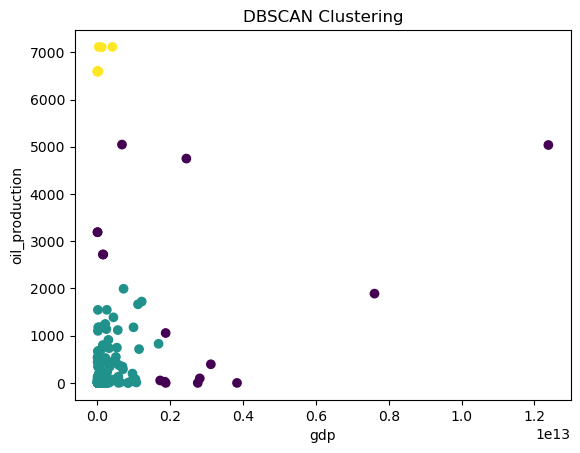

In [111]:

# Aplica DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=X_.columns)
X_with_labels['Cluster'] = dbscan_labels


# Visualización de los clusters
plt.scatter(X_with_labels['gdp'], X_with_labels['oil_production'], c=X_with_labels['Cluster'], cmap='viridis')
plt.xlabel('gdp')
plt.ylabel('oil_production')
plt.title('DBSCAN Clustering')
plt.show()


# DBSCAN 4 features

In [113]:
features = ["gdp", "renewables_consumption", "primary_energy_consumption" ]
X = mean_values[features]
X.head(5)

,gdp,renewables_consumption,primary_energy_consumption
0,3.626833e+10,0.714,17.649525
1,1.925028e+10,0.714,36.627075
2,3.199250e+11,0.795,377.235475
3,5.340000e+11,1.923,2.109125
4,5.485567e+10,1.923,48.328450


In [114]:
X_ = X

In [36]:
Q1 = X.quantile(0.10)
Q3 = X.quantile(0.90)
IQR = Q3 - Q1

# Encuentra las posiciones de los outliers
outlier_positions = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
X_= X[~outlier_positions]
X_.shape



(202, 4)

In [115]:
scale = StandardScaler()

X_scal = scale.fit_transform(X_)

c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Luna\anaconda3\envs\ds-python\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [116]:
from sklearn.metrics.pairwise import pairwise_distances

avg_distance = pairwise_distances(X_scal).mean()
avg_distance


1.2204268718084517

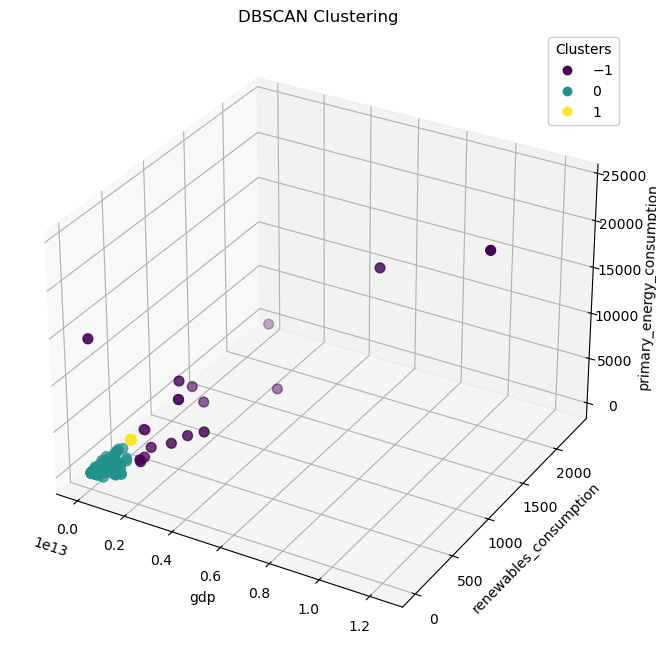

In [118]:

# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]
# Aplica DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=['gdp', 'renewables_consumption', 'primary_energy_consumption'])
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_with_labels['gdp'], X_with_labels['renewables_consumption'], X_with_labels['primary_energy_consumption'],
                     c=X_with_labels['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('gdp')
ax.set_ylabel('renewables_consumption')
ax.set_zlabel('primary_energy_consumption')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


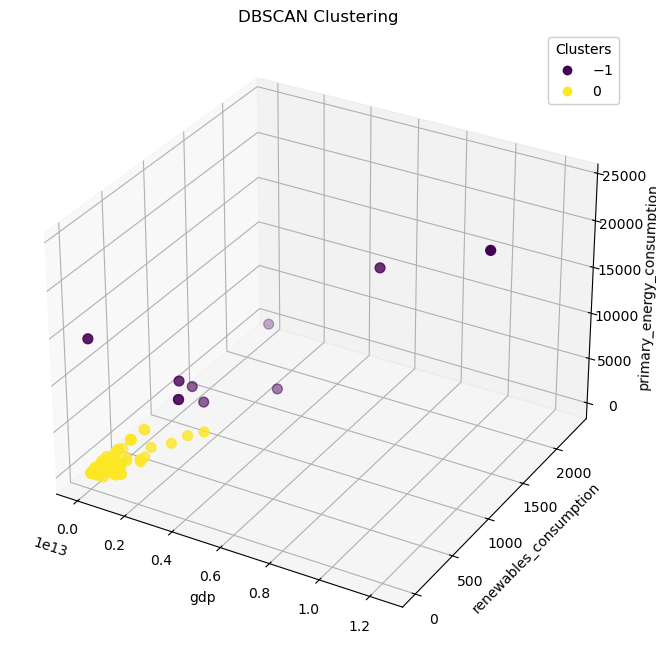

In [121]:

# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]
# Aplica DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=['gdp', 'renewables_consumption', 'primary_energy_consumption'])
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_with_labels['gdp'], X_with_labels['renewables_consumption'], X_with_labels['primary_energy_consumption'],
                     c=X_with_labels['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('gdp')
ax.set_ylabel('renewables_consumption')
ax.set_zlabel('primary_energy_consumption')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


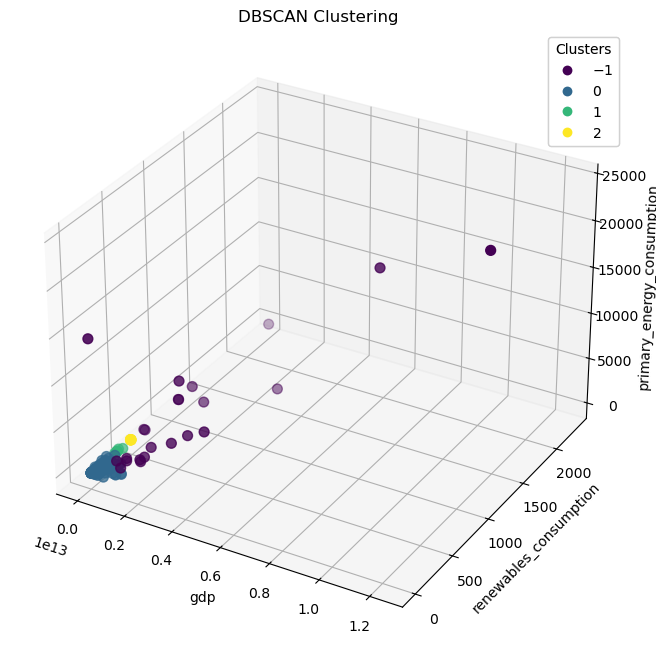

In [120]:

# features = ["gdp", "energy_per_capita", "primary_energy_consumption"]
# Aplica DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=['gdp', 'renewables_consumption', 'primary_energy_consumption'])
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_with_labels['gdp'], X_with_labels['renewables_consumption'], X_with_labels['primary_energy_consumption'],
                     c=X_with_labels['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('gdp')
ax.set_ylabel('renewables_consumption')
ax.set_zlabel('primary_energy_consumption')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


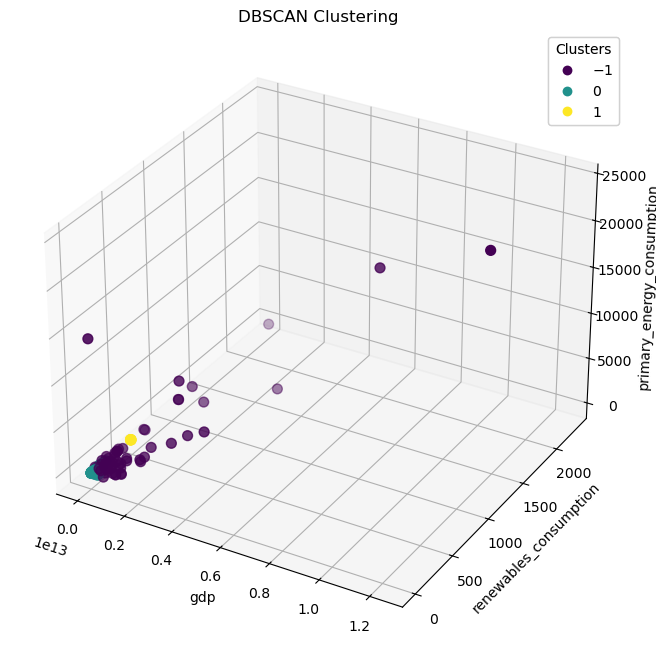

In [122]:
# Aplica DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scal)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=['gdp', 'renewables_consumption', 'primary_energy_consumption'])
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_with_labels['gdp'], X_with_labels['renewables_consumption'], X_with_labels['primary_energy_consumption'],
                     c=X_with_labels['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('gdp')
ax.set_ylabel('renewables_consumption')
ax.set_zlabel('primary_energy_consumption')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


## Columns and their description
column 	description
iso_code 	ISO 3166-1 alpha-3 three-letter country codes
country 	Geographic location
year 	Year of observation
coal_prod_change_pct 	Annual percentage change in coal production
coal_prod_change_twh 	Annual change in coal production, measured in terawatt-hours
gas_prod_change_pct 	Annual percentage change in gas production
gas_prod_change_twh 	Annual change in gas production, measured in terawatt-hours
oil_prod_change_pct 	Annual percentage change in oil production
oil_prod_change_twh 	Annual change in oil production, measured in terawatt-hours
energy_cons_change_pct 	Annual percentage change in primary energy consumption
energy_cons_change_twh 	Annual change in primary energy consumption, measured in terawatt-hours
biofuel_share_elec 	Share of electricity consumption that comes from biofuels
biofuel_cons_change_pct 	Annual percentage change in biofuel consumption
biofuel_share_energy 	Share of primary energy consumption that comes from biofuels
biofuel_cons_change_twh 	Annual change in biofuel consumption, measured in terawatt-hours
biofuel_consumption 	Primary energy consumption from biofuels, measured in terawatt-hours
biofuel_elec_per_capita 	Per capita electricity consumption from biofuels, measured in kilowatt-hours
biofuel_cons_per_capita 	Per capita primary energy consumption from biofuels, measured in kilowatt-hours
carbon_intensity_elec 	Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour
coal_share_elec 	Share of electricity consumption that comes from coal
coal_cons_change_pct 	Annual percentage change in coal consumption
coal_share_energy 	Share of primary energy consumption that comes from coal
coal_cons_change_twh 	Annual change in coal consumption, measured in terawatt-hours
coal_consumption 	Primary energy consumption from coal, measured in terawatt-hours
coal_elec_per_capita 	Per capita electricity consumption from coal, measured in kilowatt-hours
coal_cons_per_capita 	Per capita primary energy consumption from coal, measured in kilowatt-hours
coal_production 	Coal production, measured in terawatt-hours
coal_prod_per_capita 	Per capita coal production, measured in kilowatt-hours
electricity_generation 	Electricity generation, measured in terawatt-hours
biofuel_electricity 	Electricity generation from biofuels, measured in terawatt-hours
coal_electricity 	Electricity generation from coal, measured in terawatt-hours
fossil_electricity 	Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.
gas_electricity 	Electricity generation from gas, measured in terawatt-hours
hydro_electricity 	Electricity generation from hydropower, measured in terawatt-hours
nuclear_electricity 	Electricity generation from nuclear power, measured in terawatt-hours
oil_electricity 	Electricity generation from oil, measured in terawatt-hours
other_renewable_electricity 	Electricity generation from other renewable sources, measured in terawatt-hours
other_renewable_exc_biofuel_electricity 	Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours
renewables_electricity 	Electricity generation from renewables, measured in terawatt-hours
solar_electricity 	Electricity generation from solar, measured in terawatt-hours
wind_electricity 	Electricity generation from wind, measured in terawatt-hours
energy_per_gdp 	Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.
energy_per_capita 	Primary energy consumption per capita, measured in kilowatt-hours per year
fossil_cons_change_pct 	Annual percentage change in fossil fuel consumption
fossil_share_energy 	Share of primary energy consumption that comes from fossil fuels
fossil_cons_change_twh 	Annual change in fossil fuel consumption, measured in terawatt-hours
fossil_fuel_consumption 	Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_energy_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_cons_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_share_elec 	Share of electricity consumption that comes from fossil fuels (coal, oil and gas combined)
gas_share_elec 	Share of electricity consumption that comes from gas
gas_cons_change_pct 	Annual percentage change in gas consumption
gas_share_energy 	Share of primary energy consumption that comes from gas
gas_cons_change_twh 	Annual change in gas consumption, measured in terawatt-hours
gas_consumption 	Primary energy consumption from gas, measured in terawatt-hours
gas_elec_per_capita 	Per capita electricity consumption from gas, measured in kilowatt-hours
gas_energy_per_capita 	Per capita primary energy consumption from gas, measured in kilowatt-hours
gas_production 	Gas production, measured in terawatt-hours
gas_prod_per_capita 	Per capita gas production, measured in kilowatt-hours
hydro_share_elec 	Share of electricity consumption that comes from hydropower
hydro_cons_change_pct 	Annual percentage change in hydropower consumption
hydro_share_energy 	Share of primary energy consumption that comes from hydropower
hydro_cons_change_twh 	Annual change in hydropower consumption, measured in terawatt-hours
hydro_consumption 	Primary energy consumption from hydropower, measured in terawatt-hours
hydro_elec_per_capita 	Per capita electricity consumption from hydropower, measured in kilowatt-hours
hydro_energy_per_capita 	Per capita primary energy consumption from hydropower, measured in kilowatt-hours
low_carbon_share_elec 	Share of electricity consumption that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear
low_carbon_electricity 	Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power
low_carbon_elec_per_capita 	Per capita electricity consumption from low-carbon sources, measured in kilowatt-hours
low_carbon_cons_change_pct 	Annual percentage change in low-carbon energy consumption
low_carbon_share_energy 	Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear
low_carbon_cons_change_twh 	Annual change in low-carbon energy consumption, measured in terawatt-hours
low_carbon_consumption 	Primary energy consumption from low-carbon sources, measured in terawatt-hours
low_carbon_energy_per_capita 	Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours
nuclear_share_elec 	Share of electricity consumption that comes from nuclear power
nuclear_cons_change_pct 	Annual percentage change in nuclear consumption
nuclear_share_energy 	Share of primary energy consumption that comes from nuclear power
nuclear_cons_change_twh 	Annual change in nuclear consumption, measured in terawatt-hours
nuclear_consumption 	Primary energy consumption from nuclear power, measured in terawatt-hours
nuclear_elec_per_capita 	Per capita electricity consumption from nuclear power, measured in kilowatt-hours
nuclear_energy_per_capita 	Per capita primary energy consumption from nuclear, measured in kilowatt-hours
oil_share_elec 	Share of electricity consumption that comes from oil
oil_cons_change_pct 	Annual percentage change in oil consumption
oil_share_energy 	Share of primary energy consumption that comes from oil
oil_cons_change_twh 	Annual change in oil consumption, measured in terawatt-hours
oil_consumption 	Primary energy consumption from oil, measured in terawatt-hours
oil_elec_per_capita 	Primary energy consumption from oil, measured in terawatt-hours
oil_energy_per_capita 	Per capita primary energy consumption from oil, measured in kilowatt-hours
oil_production 	Oil production, measured in terawatt-hours
oil_prod_per_capita 	Per capita oil production, measured in kilowatt-hours
other_renewables_elec_per_capita 	Per capita electricity consumption from other renewables, measured in kilowatt-hours
other_renewables_share_elec 	Share of electricity consumption that comes from other renewables
other_renewables_cons_change_pct 	Annual percentage change in energy consumption from other renewables
other_renewables_share_energy 	Share of primary energy consumption that comes from other renewables
other_renewables_cons_change_twh 	Annual change in other renewable consumption, measured in terawatt-hours
other_renewable_consumption 	Primary energy consumption from other renewables, measured in terawatt-hours
other_renewables_energy_per_capita 	Per capita primary energy consumption from other renewables, measured in kilowatt-hours
per_capita_electricity 	Electricity consumption per capita, measured in kilowatt-hours
population 	Total population
primary_energy_consumption 	Primary energy consumption, measured in terawatt-hours
renewables_elec_per_capita 	Per capita primary energy consumption from renewables, measured in kilowatt-hours
renewables_share_elec 	Share of electricity consumption that comes from renewables
renewables_cons_change_pct 	Annual percentage change in renewable energy consumption
renewables_share_energy 	Share of primary energy consumption that comes from renewables
renewables_cons_change_twh 	Annual change in renewable energy consumption, measured in terawatt-hours
renewables_consumption 	Primary energy consumption from renewables, measured in terawatt-hours
renewables_energy_per_capita 	Per capita electricity consumption from renewables, measured in kilowatt-hours
solar_share_elec 	Share of electricity consumption that comes from solar
solar_cons_change_pct 	Annual percentage change in solar consumption
solar_share_energy 	Share of primary energy consumption that comes from solar
solar_cons_change_twh 	Annual change in solar consumption, measured in terawatt-hours
solar_consumption 	Primary energy consumption from solar, measured in terawatt-hours
solar_elec_per_capita 	Per capita electricity consumption from solar, measured in kilowatt-hours
solar_energy_per_capita 	Per capita primary energy consumption from solar, measured in kilowatt-hours
gdp 	Total real gross domestic product, inflation-adjusted
wind_share_elec 	Share of electricity consumption that comes from wind
wind_cons_change_pct 	Annual percentage change in wind consumption
wind_share_energy 	Share of primary energy consumption that comes from wind
wind_cons_change_twh 	Annual change in wind consumption, measured in terawatt-hours
wind_consumption 	Primary energy consumption from wind, measured in terawatt-hours
wind_elec_per_capita 	Per capita electricity consumption from wind, measured in kilowatt-hours
wind_energy_per_capita 	Per capita primary energy consumption from wind, measured in kilowatt-hours

In [55]:
cadena = '_change'
# Filtra las columnas que no contienen la cadena
columnas_conservar = [col for col in wec.columns if cadena not in col]

wec_f = wec[columnas_conservar]
wec_f.shape

(8561, 92)

In [56]:
cadena2 = '_share'
# Filtra las columnas que no contienen la cadena
columnas_conservar2 = [col for col in wec_f.columns if cadena2 not in col]

wec_f2 = wec[columnas_conservar2]
wec_f2.shape

(8561, 68)

In [59]:
print(wec_f2.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'iso_code', 'country', 'year', 'biofuel_elec_per_capita', 'biofuel_consumption', 'biofuel_cons_per_capita',
       'carbon_intensity_elec', 'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita',
       'electricity_generation', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity',
       'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity',
       'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'fossil_fuel_consumption', 'fossil_energy_per_capita',
       'fossil_cons_per_capita', 'gas_consumption', 'gas_elec_per_capita', 'gas_energy_per_capita', 'gas_production', 'gas_prod_per_capita',
       'hydro_consumption', 'hydro_elec_per_capita', 'hydro_energy_per_capita', 'low_carbon_electricity', 'low_carbon_elec_per_capita',
      

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (359695125.py, line 1)

In [45]:
filtrar1

,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_cons_change_pct,biofuel_cons_change_twh,coal_cons_change_pct,coal_cons_change_twh,fossil_cons_change_pct,fossil_cons_change_twh,gas_cons_change_pct,gas_cons_change_twh,hydro_cons_change_pct,hydro_cons_change_twh,low_carbon_cons_change_pct,low_carbon_cons_change_twh,nuclear_cons_change_pct,nuclear_cons_change_twh,oil_cons_change_pct,oil_cons_change_twh,other_renewables_cons_change_pct,other_renewables_cons_change_twh,renewables_cons_change_pct,renewables_cons_change_twh,solar_cons_change_pct,solar_cons_change_twh,wind_cons_change_pct,wind_cons_change_twh
0,-35.709,-0.384,-29.942,-1.313,21.949,5.361,12.338,0.959,47.590,0.0,-11.111,-0.093,19.436,28.703,34.238,27.913,-11.684,-0.094,-11.684,-0.094,-13.076,0.0,1.353,0.884,2.201,0.000,-11.684,-0.094,97.893,0.000,1788.693,0.000
1,5.042,0.035,-29.942,-1.313,21.949,5.361,12.338,0.959,47.590,0.0,-11.111,-0.093,19.436,28.703,34.238,27.913,-11.684,-0.094,-11.684,-0.094,-13.076,0.0,1.353,0.884,2.201,0.000,-11.684,-0.094,97.893,0.000,1788.693,0.000
2,16.000,0.116,-29.942,-1.313,21.949,5.361,4.617,0.403,47.590,0.0,-11.111,-0.093,19.436,28.703,34.238,27.913,-11.684,-0.094,-11.684,-0.094,-13.076,0.0,1.353,0.884,2.201,0.000,-11.684,-0.094,97.893,0.000,1788.693,0.000
3,0.000,0.000,-29.942,-1.313,21.949,5.361,20.486,1.871,47.590,0.0,-11.111,-0.093,19.436,28.703,34.238,27.913,-11.684,-0.094,-11.684,-0.094,-13.076,0.0,1.353,0.884,2.201,0.000,-11.684,-0.094,97.893,0.000,1788.693,0.000
4,2.069,0.017,-29.942,-1.313,21.949,5.361,0.452,0.050,47.590,0.0,-11.111,-0.093,19.436,28.703,34.238,27.913,-11.684,-0.094,-11.684,-0.094,-13.076,0.0,1.353,0.884,2.201,0.000,-11.684,-0.094,97.893,0.000,1788.693,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8556,-25.013,-10.847,0.797,0.000,20.462,0.000,-0.789,-0.443,-0.054,0.0,30.224,133.451,17.955,147.671,1.999,1.931,-22.683,-47.629,-17.572,-37.115,-0.082,0.0,4.323,12.289,-0.369,-0.001,-17.572,-37.115,3570.161,10.071,57.655,0.445
8557,-37.694,-12.257,0.797,0.000,20.462,0.000,-14.633,-8.142,-0.054,0.0,30.224,133.451,17.955,147.671,1.999,1.931,-22.683,-47.629,-17.572,-37.115,-0.082,0.0,4.323,12.289,-0.369,-0.001,-17.572,-37.115,3570.161,10.071,57.655,0.445
8558,8.375,1.697,0.797,0.000,20.462,0.000,-14.633,-8.142,-0.054,0.0,30.224,133.451,17.955,147.671,1.999,1.931,-22.683,-47.629,-17.572,-37.115,-0.082,0.0,4.323,12.289,-0.369,-0.001,-17.572,-37.115,3570.161,10.071,57.655,0.445
8559,22.555,4.952,0.797,0.000,20.462,0.000,-14.633,-8.142,-0.054,0.0,30.224,133.451,17.955,147.671,1.999,1.931,-22.683,-47.629,-17.572,-37.115,-0.082,0.0,4.323,12.289,-0.369,-0.001,-17.572,-37.115,3570.161,10.071,57.655,0.445


In [44]:
wec_f = wec[~filtrar1]
wec_f.shape

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [48]:
wec.drop(filtrar1, axis=1)

,Unnamed: 0.1,Unnamed: 0,iso_code,country,year,biofuel_share_elec,biofuel_elec_per_capita,biofuel_share_energy,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_share_energy,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_energy,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_share_energy,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_share_energy,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_share_energy,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_share_energy,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_share_energy,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_share_energy,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_share_energy,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_share_energy,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_share_energy,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,0,80,AFG,Afghanistan,1980,0.000,0.000,0.0,0.0,0.0,158.0,0.000,0.420,0.744,0.000,38.722,0.691,51.724,0.467,0.000,0.000,0.155,0.155,0.312,0.0,0.0,0.000,0.0,0.312,0.000,0.0,0.245,581.932,99.597,176.383,9176.108,7.459,33.191,33.191,61.795,109.436,7.459,5693.286,3.071,1144.68,66.809,0.403,0.714,15.014,37.139,66.809,0.312,15.014,0.403,0.714,37.139,0.0,0.0,0.0,0.0,0.0,0.0,37.382,66.202,0.0,3444.100,29.784,11100.856,0.000,0.000,0.000,0.000,0.000,22.474,13357000.0,7.773,15.014,66.809,0.403,0.714,37.139,0.000,0.000,0.000,0.000,0.000,3.171275e+10,0.0,0.000,0.000,0.0,0.000
1,1,81,AFG,Afghanistan,1981,0.000,0.000,0.0,0.0,0.0,158.0,0.000,0.420,0.744,0.000,38.722,0.726,55.095,0.467,0.000,0.000,0.155,0.155,0.312,0.0,0.0,0.000,0.0,0.312,0.000,0.0,0.270,662.913,99.597,176.383,9176.108,7.459,33.191,33.191,61.795,109.436,7.459,5693.286,3.071,1144.68,66.809,0.403,0.714,15.014,37.139,66.809,0.312,15.014,0.403,0.714,37.139,0.0,0.0,0.0,0.0,0.0,0.0,37.382,66.202,0.0,3444.100,29.784,11100.856,0.000,0.000,0.000,0.000,0.000,22.474,13172000.0,8.732,15.014,66.809,0.403,0.714,37.139,0.000,0.000,0.000,0.000,0.000,3.239844e+10,0.0,0.000,0.000,0.0,0.000
2,2,82,AFG,Afghanistan,1982,0.000,0.000,0.0,0.0,0.0,158.0,0.000,0.420,0.744,0.000,38.722,0.842,65.344,0.467,0.000,0.000,0.155,0.155,0.312,0.0,0.0,0.000,0.0,0.312,0.000,0.0,0.276,709.075,99.597,176.383,9176.108,7.459,33.191,33.191,61.795,109.436,7.459,5693.286,3.071,1144.68,66.809,0.403,0.714,15.014,37.139,66.809,0.312,15.014,0.403,0.714,37.139,0.0,0.0,0.0,0.0,0.0,0.0,37.382,66.202,0.0,3444.100,29.784,11100.856,0.000,0.000,0.000,0.000,0.000,22.474,12883000.0,9.135,15.014,66.809,0.403,0.714,37.139,0.000,0.000,0.000,0.000,0.000,3.306812e+10,0.0,0.000,0.000,0.0,0.000
3,3,83,AFG,Afghanistan,1983,0.000,0.000,0.0,0.0,0.0,158.0,0.000,0.420,0.744,0.000,38.722,0.842,67.142,0.467,0.000,0.000,0.155,0.155,0.312,0.0,0.0,0.000,0.0,0.312,0.000,0.0,0.317,877.846,99.597,176.383,9176.108,7.459,33.191,33.191,61.795,109.436,7.459,5693.286,3.071,1144.68,66.809,0.403,0.714,15.014,37.139,66.809,0.312,15.014,0.403,0.714,37.139,0.0,0.0,0.0,0.0,0.0,0.0,37.382,66.202,0.0,3444.100,29.784,11100.856,0.00

In [49]:
wec

,Unnamed: 0.1,Unnamed: 0,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,0,80,AFG,Afghanistan,1980,-35.709,-0.384,-29.942,-1.313,21.949,5.361,12.338,0.959,0.000,0.000,47.590,0.0,0.0,0.0,0.0,158.0,0.000,-11.111,0.420,-0.093,0.744,0.000,38.722,0.691,51.724,0.467,0.000,0.000,0.155,0.155,0.312,0.0,0.0,0.000,0.0,0.312,0.000,0.0,0.245,581.932,19.436,99.597,28.703,176.383,9176.108,7.459,33.191,33.191,34.238,61.795,27.913,109.436,7.459,5693.286,3.071,1144.68,66.809,-11.684,0.403,-0.094,0.714,15.014,37.139,66.809,0.312,15.014,-11.684,0.403,-0.094,0.714,37.139,0.0,-13.076,0.0,0.0,0.0,0.0,0.0,0.0,1.353,37.382,0.884,66.202,0.0,3444.100,29.784,11100.856,0.000,0.000,2.201,0.000,0.000,0.000,0.000,22.474,13357000.0,7.773,15.014,66.809,-11.684,0.403,-0.094,0.714,37.139,0.000,97.893,0.000,0.000,0.000,0.000,0.000,3.171275e+10,0.0,1788.693,0.000,0.000,0.000,0.0,0.000
1,1,81,AFG,Afghanistan,1981,5.042,0.035,-29.942,-1.313,21.949,5.361,12.338,0.959,0.000,0.000,47.590,0.0,0.0,0.0,0.0,158.0,0.000,-11.111,0.420,-0.093,0.744,0.000,38.722,0.726,55.095,0.467,0.000,0.000,0.155,0.155,0.312,0.0,0.0,0.000,0.0,0.312,0.000,0.0,0.270,662.913,19.436,99.597,28.703,176.383,9176.108,7.459,33.191,33.191,34.238,61.795,27.913,109.436,7.459,5693.286,3.071,1144.68,66.809,-11.684,0.403,-0.094,0.714,15.014,37.139,66.809,0.312,15.014,-11.684,0.403,-0.094,0.714,37.139,0.0,-13.076,0.0,0.0,0.0,0.0,0.0,0.0,1.353,37.382,0.884,66.202,0.0,3444.100,29.784,11100.856,0.000,0.000,2.201,0.000,0.00

In [28]:
sel = ["Uruguay", "Brazil", "Argentina",
  "United States", "China"]

In [29]:
paracoco = wec.loc[wec['country'].isin(sel)]

In [31]:
paracoco.to_csv(r"../datasets/paracoco.csv")